
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [114]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv
/kaggle/input/worldcities/worldcities.csv
/kaggle/input/cost-of-living-2020/cost of living 2020.csv


In [115]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [116]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [117]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')
living_price = pd.read_csv('/kaggle/input/cost-of-living-2020/cost of living 2020.csv')
towns = pd.read_csv('/kaggle/input/worldcities/worldcities.csv')

In [118]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [119]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [120]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [121]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [122]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [123]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [124]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [126]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
37963,id_5754,Paris,NaN,5755.0,NaN,15.0,"[['Perfect Location and Good Food', 'Perfect a...",/Restaurant_Review-g187147-d11909063-Reviews-M...,d11909063,1,4.0
235,id_235,Prague,['Italian'],1662.0,$$ - $$$,4.0,"[['Lovely place - I fell in love :)', 'Addicti...",/Restaurant_Review-g274707-d11948178-Reviews-V...,d11948178,0,0.0
43449,id_3218,Rome,['Italian'],3219.0,$$ - $$$,167.0,"[['Saturday Night in Rome.'], ['04/29/2017']]",/Restaurant_Review-g187791-d8279651-Reviews-Ba...,d8279651,1,4.0
13434,id_1218,Prague,"['Chinese', 'Asian', 'Vegetarian Friendly']",1219.0,$,97.0,"[['Good value food', 'Great food & great value...",/Restaurant_Review-g274707-d5408611-Reviews-Mo...,d5408611,1,4.0
8824,id_8824,London,"['Bar', 'European', 'British', 'International'...",2367.0,$$ - $$$,260.0,"[['Lovely lunch', 'Very good breakfast'], ['10...",/Restaurant_Review-g186338-d1389745-Reviews-PJ...,d1389745,0,0.0


# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.

## Обработка признаков


In [127]:
# Для начала посмотрим на наши данные:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Видно, что в нашем датасете всего 10 столбцов, из которых 3 числовых и 7 текстовых. Встречаются пропущенные значения в столбцах Cuisine Style, Price Range и Number of Reviews. Чтобы наглядно оценить количество пропущенных значений, давайте посторим диаграмму.

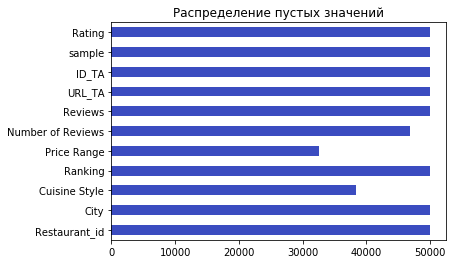

In [128]:
a = 50000 - data.isna().sum()
a.plot(kind = 'barh', colormap = 'coolwarm', title = 'Распределение пустых значений')

На диаграмме хорошо видно, что наибольшее количество пропусков в столбце Price Range. На втором месте идет столбец Cuisine Style. На третьем - Numbers of Reviews. Далее попробуем поработать с этими пропусками, но начнем с анализа столбцов по порядку их расположения. Возможно найдем, что-то интересное.

In [129]:
data.sample(3)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
28356,id_249,Helsinki,NaN,250.0,NaN,84.0,[['lovely place to end your evening with a vi....,/Restaurant_Review-g189934-d3453762-Reviews-At...,d3453762,1,4.0
23669,id_2893,Madrid,"['Chinese', 'Asian']",2895.0,$$ - $$$,99.0,"[['We went to pick up the food', 'tasty dim su...",/Restaurant_Review-g187514-d4761906-Reviews-Ts...,d4761906,1,4.0
39455,id_14525,London,NaN,14536.0,NaN,19.0,"[[""Nice cocktails and ok if you don't mind ci....",/Restaurant_Review-g186338-d8297847-Reviews-Ro...,d8297847,1,3.0


## 1. Проанализируем столбец Restaurant_id
Пропусков в этом столбце нет, но на всякий случай проверим на повторяющиеся значения.

In [130]:
data.Restaurant_id.value_counts().head(5)

id_227    19
id_871    19
id_436    19
id_633    19
id_534    18
Name: Restaurant_id, dtype: int64

В этом столбце имеются повторяющиеся идентификаторы ресторанов. Скорее всего это сетевые рестораны. Наверное, стоит создать новый признак rest_chain и присвоить сетевым ресторанам идентификатор 1, а несетевым - 0.

In [131]:
# Создадим список с ресторанами, у которых больше одного заведения:
rest_chain = list(data.Restaurant_id.value_counts()[data.Restaurant_id.value_counts() > 1].index)
# Добавим новый столбец в наш датафрейм:
data['rest_chain'] = data[data.Restaurant_id.isin(rest_chain)].Restaurant_id.apply(lambda x: 1)
# Присвоим ноль в этом столбце не сетевым ресторанам:
data['rest_chain'].fillna(0, inplace=True)
# Посмотрим сколько у нас сетевых и не сетевых рестранов:
data.rest_chain.value_counts()

1.0    46193
0.0     3807
Name: rest_chain, dtype: int64

Сетевых ресторанов оказалось значительно больше. Возможно, что сетевые рестораны больше заинтересованы во включении себя базу данных.

## 2. Проанализируем столбец City
Прпусков в данном столбце нет. Посмотрим на распределение ресторанов по городам.

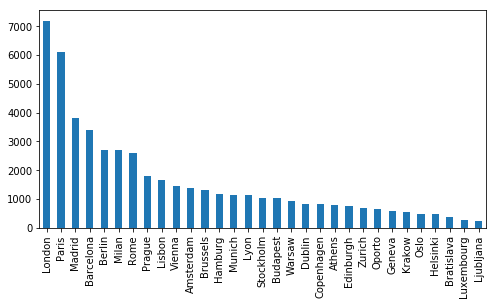

In [132]:
plt.figure(figsize=(8,4))
data.City.value_counts(ascending=False).plot(kind='bar');

Исправим название города Oporto на привычное Porto и поработаем с информацией в датасете по городам.

In [133]:
data.loc[data.City == 'Oporto', 'City'] = 'Porto'
city = data.City.unique()

In [134]:
data['ranked_cities'] = data['City'].rank()

In [135]:
towns = towns[(towns.city_ascii.isin(city)) &
                  (towns.country != 'United States') &
                  (towns.country != 'Canada') &
                  (towns.country != 'Venezuela')]

In [136]:
set(city) - set(towns.city_ascii) # проверяем все ли города нашли

set()

In [137]:
# Удалим ненужные колонки:
towns = towns.drop(['city', 'iso2', 'iso3', 'admin_name',  'id'], axis=1)

In [138]:
# Переведем в млн. человек:
towns['population']  = round((towns['population'] / 1000000), 2)

In [139]:
# Добавим признак "столица":
towns.capital.fillna('primary', inplace=True)

In [140]:
towns['capital'] = towns.capital.apply(lambda x: 1 if x == 'primary' else 0)

Больше всего ресторанов в Париже и Лондоне. Потом добавим сюда датасет с информацией по городам и посмотрим, что произойдет. Может парочку признаков удасться оттуда вытащить.
Еще можно создать признак города. Всего 31 город, можно каждому городу присвоить пятибитное значение от 00000 до 11111.

In [141]:
city_dict = {'London': 11111,
              'Paris': 11110,
              'Madrid': 11101,
              'Barcelona': 11100,
              'Berlin': 11011,
              'Milan': 11010,
              'Rome': 11001,
              'Prague': 11000,
              'Lisbon': 11101,
              'Vienna': 10111,
              'Amsterdam': 10110,
              'Brussels': 10101,
              'Hamburg': 10100,
              'Munich': 10011,
              'Lyon': 10010,
              'Stockholm': 10001,
              'Budapest': 10000,
              'Warsaw': 1111,
              'Dublin': 1110,
              'Copenhagen': 1101,
              'Athens': 1100,
              'Edinburgh': 1011,
              'Zurich': 1010,
              'Oporto': 1001,
              'Geneva': 1000,
              'Krakow': 111,
              'Oslo': 110,
              'Helsinki': 101,
              'Bratislava': 100,
              'Luxembourg': 11,
              'Ljubljana': 10,
             }
data['city_id'] = data['City'].map(city_dict)

In [142]:
# На всякий случай создадим новую колонку, в которой будут хранится названия городов.
data['City_name'] = data['City']

Проанализируем датасет уровня жизни:

In [143]:
country_lst = towns['country'].tolist()

In [144]:
living_price.head(3)

,Rank 2020,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,McMeal($),Unnamed: 9
0,1,Bermuda,147.77,85.70,117.54,146.63,152.52,78.17,0.00,NaN
1,2,Switzerland,125.69,51.20,89.41,124.93,118.55,114.83,15.36,NaN
2,3,Norway,96.80,32.61,65.54,89.55,96.81,83.40,12.36,NaN


In [145]:
living_price.loc[living_price.Country.str.contains('Czec'), 'Country'] = 'Czechia'
living_price = living_price[living_price.Country.isin(country_lst)]

In [146]:
set(country_lst) - set(living_price.Country)

set()

In [147]:
# Удалим странный столбец:
living_price.drop('Unnamed: 9', axis=1, inplace=True)

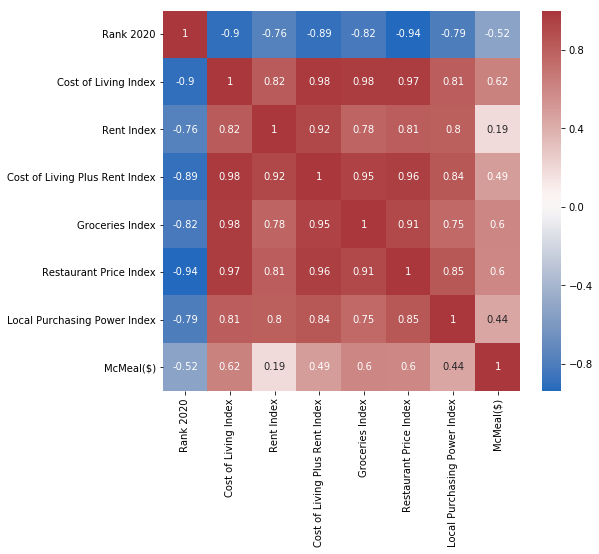

In [148]:
# Проведем корреляционный анализ:
plt.figure(figsize=(8,7))
sns.heatmap(living_price.corr(), annot=True, cmap='vlag');

Выберем несколько признаков, которые могут улучшить модель:

In [149]:
living_price.columns

Index(['Rank 2020', 'Country', 'Cost of Living Index', 'Rent Index',
       'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index', 'McMeal($)'],
      dtype='object')

In [150]:
living_price.drop(['Rent Index', 'Cost of Living Plus Rent Index',
           'Groceries Index', 'Local Purchasing Power Index' ], axis=1, inplace=True)

Объединим датасеты в один:

In [151]:
towns = towns.join(living_price.set_index('Country'), on='country')

In [152]:
data = data.join(towns.set_index('city_ascii'), on='City')

In [153]:
# Создадим признак количество ресторанов в городе.
city_counts_dict = dict(data['City_name'].value_counts())

In [154]:
data['rest_counts'] = data.City.map(city_counts_dict)

Добавим dummy variables, фиктивные признаки, как рекомендуют в baseline:

In [155]:
data = pd.get_dummies(data, columns=['City_name'], dummy_na=True)

## 3. Проанализируем столбец Cuisine Style
Пропусков тут довольно много. Как лучше заполнить эти пропуски? Сначала посмотрим сколько и различных кухонь представлено. Учитываем, что у одного ресторана может быть сразу несколько кухонь.

In [156]:
# Создадим признак отсуствия информации о кухне:
data['Cuisine Style_NAN'] = data['Cuisine Style'].isna().astype('uint8')

In [157]:
# Пропуски заполним значением Other
data['Cuisine Style'].fillna("['Other']",inplace=True)
# Превратим значения в столбце в списки:
data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x: eval(x))
# Найдем уникальные значения:
s = data['Cuisine Style'].explode()
pd.Series(s).value_counts()

Vegetarian Friendly    14021
European               12561
Other                  11590
Mediterranean           7820
Italian                 7433
                       ...  
Fujian                     2
Latvian                    1
Salvadoran                 1
Burmese                    1
Xinjiang                   1
Name: Cuisine Style, Length: 126, dtype: int64

Без учета пропусков, которые заполнены Other, имеем 125 разных кухонь. Самое большое количество ресторанов с кухнями Vegetarian Friendly и European. Возможно, стоит проанализировать в каких ресторанах чаще встречается European или Vegetarian Friendly и затем найти признак, по которому их можно будет распределить вместо признака Other. Также можно этим ресторанам проставить европейскую кухню и вегетарианскую - два самых частых значения.
Какой числовой признак можно выделить из этого столбика? Например, количество кухонь в одном ресторане.

In [158]:
data['cuisine_count'] = data['Cuisine Style'].apply(lambda x: len(x))

Посмотрим частоту встречаемости кухонь и выберем редкие (< 50)

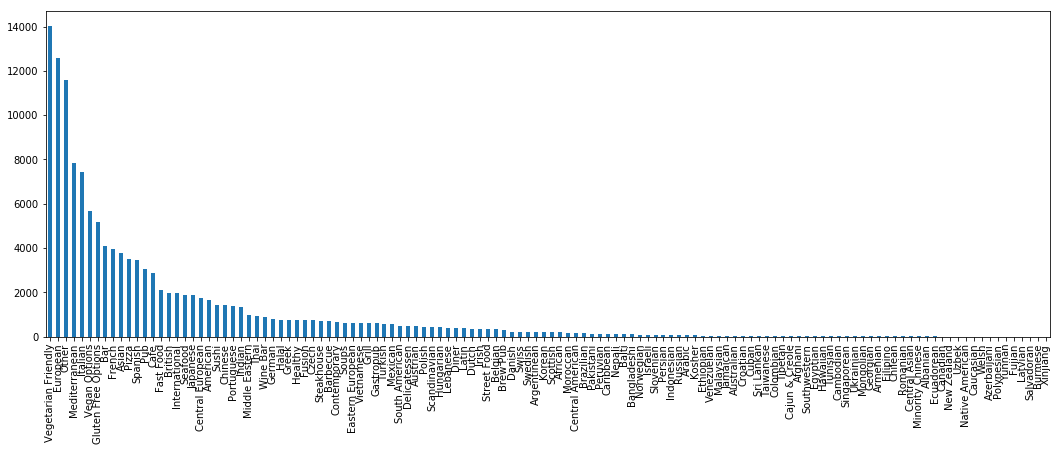

In [159]:
plt.figure(figsize=(18,6))
data.explode('Cuisine Style')['Cuisine Style'].value_counts(ascending=False).plot(kind='bar');

Кухонь "vegetarian friendly" и "european" больше всего. Кухни, которые встречаются меньше 50 раз - редкие кухни.

In [160]:
cuisine_rare_lst = data.explode('Cuisine Style')['Cuisine Style'].value_counts()[
    data.explode('Cuisine Style')['Cuisine Style'].value_counts() < 50].index.tolist()

In [161]:
def cuisine_rare_count(cell):
    '''Количество редких кухонь в ресторане'''
    x = 0
    for i in cuisine_rare_lst:
        if i in cell:
            x += 1
    return x

In [162]:
data['cuisine_rare'] = data['Cuisine Style'].apply(cuisine_rare_count)

Создадим dummy переменные кухонь

In [163]:
cuisine_lst = list(data.explode('Cuisine Style')['Cuisine Style'].unique())

In [164]:
def find_item(cell):
    if item in cell:
        return 1
    return 0
    
for item in cuisine_lst:
    data[item] = data['Cuisine Style'].apply(find_item)

## 4. Проанализируем столбец Ranking
Место, которое занимает данный ресторан среди всех ресторанов своего города. Будем проверять, когда загрузим информацию по городам.

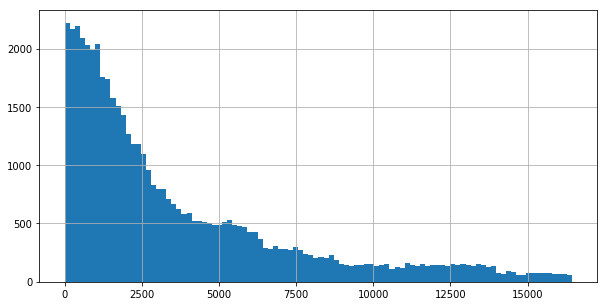

In [165]:
plt.rcParams['figure.figsize'] = (10,5)
data['Ranking'].hist(bins=100);

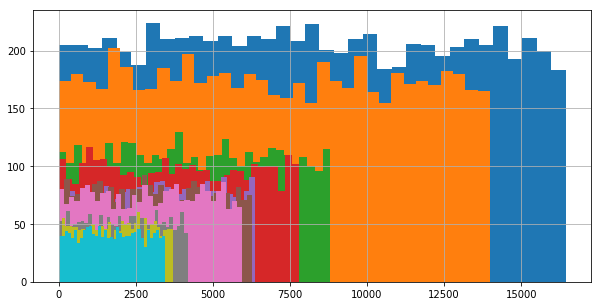

In [166]:
# посмотрим на топ 10 городов
for x in (data['City'].value_counts())[0:10].index:
    data['Ranking'][data['City'] == x].hist(bins=35)

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за этого мы имеем смещение. Разделим Ranking на количество ресторанов в городе.

In [167]:
data['ranking_norm'] = data.Ranking / data.rest_counts

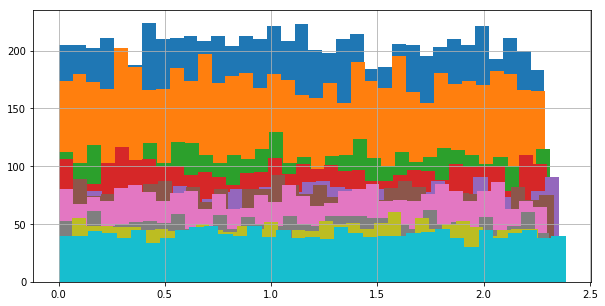

In [168]:
for x in (data['City'].value_counts())[0:10].index:
    data['ranking_norm'][data['City'] == x].hist(bins=35)

## 5. Проанализируем столбец Rating
Рейтинг ресторана по данным TripAdvisor (именно это значение должна будет предсказывать модель). С этим признаком ничего не нужно делать.

## 6. Проанализируем столбец Price Range

In [169]:
# Присвоим новому признаку значение отсутствия информации о ценовом диапазоне:
data['Price Range_NAN'] = data['Price Range'].isna().astype('uint8')

In [170]:
# Присвоим отсутствующим значениям средний ценовой диапазон:
data['Price Range'].fillna('$$ - $$$', inplace=True)

In [171]:
# Создадим признак ценового диапазона:
price_dict = {'$': 1,
              '$$ - $$$': 2,
              '$$$$': 3,
             }
data['Price Range'] = data['Price Range'].map(price_dict)

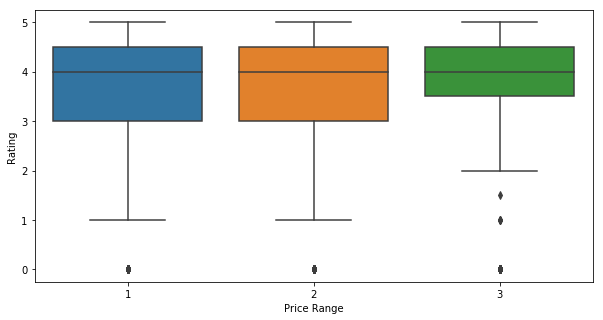

In [172]:
sns.boxplot(x='Price Range', y='Rating', data=data);

Самые дорогие рестораны реже получают низкие оценки.

## 7. Проанализируем столбец Reviews

In [173]:
# Когда был оставлен самый свежий отзыв?
data['Reviews'] = data.Reviews.dropna().apply(lambda x: eval(x.replace('nan', '').replace('[,', "['',")))
data['Reviews'] = data.Reviews.dropna().apply(lambda x: np.nan if len(x[0]) == 0 & len(x[1]) == 0 else x)

# Создадим новые признаки, date и date_1, date_2
data['date'] = data['Reviews'].dropna().apply(lambda x: x[1]) # Присвоили второе значение

# Если в date имеется два значения, то присваивается второе значение, или никакое.
data['date_1'] = data['date'].dropna().apply(lambda x: x[1] if len(x) == 2 else np.nan)
# Если в date значений больше нуля, то присваивается первое значение, или никакое.
data['date_2'] = data['date'].dropna().apply(lambda x: x[0] if len(x) > 0 else np.nan)

# Найдем количество дней между отзывами.
data['date_1'] = pd.to_datetime(data['date_1'])
data['date_2'] = pd.to_datetime(data['date_2'])
data['review_days'] = abs(data['date_2'] - data['date_1']).dt.days

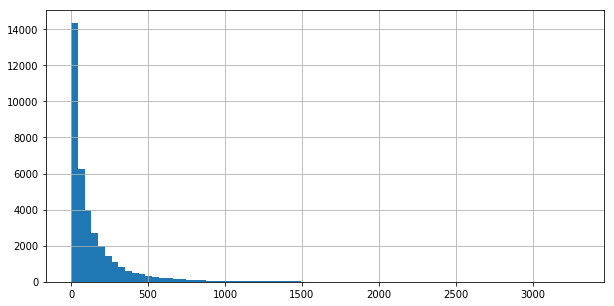

In [174]:
plt.figure(figsize=(10,5))
data['review_days'].hist(bins=75);

In [175]:
data['days_to_today'] = (datetime.now() - data['date_2']).dt.days
data['days_to_today']

0           NaN
1        1162.0
2        1139.0
3        1161.0
4        1097.0
          ...  
49995    1151.0
49996    1146.0
49997    1559.0
49998    1309.0
49999    1836.0
Name: days_to_today, Length: 50000, dtype: float64

Создадим признак количества последних коментариев

In [176]:
data['Reviews'] = data['Reviews'].dropna().apply(lambda x: x[0])

In [177]:
data['last_rewiew_counts'] = data['Reviews'].dropna().apply(
    lambda x: 2 if len(x) == 2 else 1 if len(x) == 1 else 0)

In [178]:
data.last_rewiew_counts.fillna(0, inplace=True)

In [179]:
def len_rewiews(cell):
    x = 0
    for i in cell:
        x += len(i)
    return x

In [180]:
data['len_rewiews'] = data['Reviews'].dropna().apply(len_rewiews)
data['len_rewiews'].fillna(0, inplace=True)

## 8. Проанализируем столбец Number of Reviews

Дальше проанализируем данные в колонке Number of Reviews:

In [181]:
data[data['Number of Reviews'].isna()][['Number of Reviews', 'last_rewiew_counts']].head()

,Number of Reviews,last_rewiew_counts
7,NaN,0.0
25,NaN,0.0
53,NaN,0.0
74,NaN,1.0
81,NaN,0.0


In [182]:
# Создадим признак отсутствия отзывов
data['Number of Reviews_NAN'] = data['Number of Reviews'].isna().astype('uint8')

In [183]:
data['Number of Reviews'].isna().sum()

3200

In [184]:
data.loc[(data['last_rewiew_counts'] == 0) & (
    data['Number of Reviews'].isna()), 'Number of Reviews'] = 0
data.loc[(data['last_rewiew_counts'] == 1) & (
    data['Number of Reviews'].isna()), 'Number of Reviews'] = 1

In [185]:
data['Number of Reviews'].isna().sum()

0

In [186]:
data[data['last_rewiew_counts'] ==0][['Number of Reviews', 'last_rewiew_counts']].head()

,Number of Reviews,last_rewiew_counts
0,4.0,0.0
6,2.0,0.0
7,0.0,0.0
18,2.0,0.0
20,8.0,0.0


У нас есть значения последних отзывов равные 0, хотя общее количество отзывов > 0. Это значит, что отзывы оставляли пустые.

Создадим словарь количество отзывов по городам и подставим в датасет

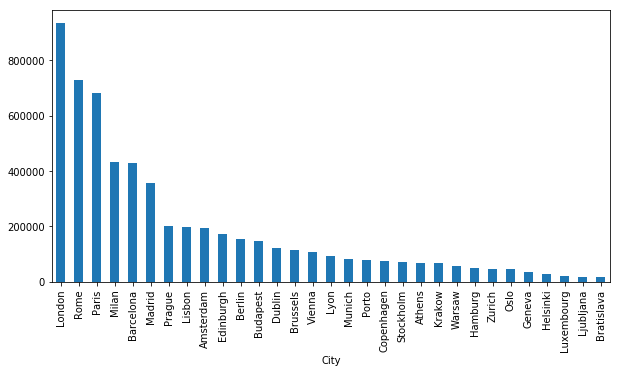

In [187]:
data.groupby('City')['Number of Reviews'].sum().sort_values(ascending=False).plot(kind='bar');

In [188]:
rewiews_city_dict = dict(data.groupby('City')['Number of Reviews'].sum())

In [189]:
data['num_rewiews_city'] = data.City.map(rewiews_city_dict)

Создадим признак отношения рейтинга в городе к количеству отзывов в городе.

In [190]:
data['relative_rank_reviews'] = data['Ranking'] / data['num_rewiews_city']

## 9. Проанализируем столбец ID_TA

In [191]:
data['ID_TA'] = data['ID_TA'].apply(lambda x: int(x[1:]))

## Удалим столбцы, с которыми работать не умеем

In [192]:
data.drop(['URL_TA'], axis=1, inplace=True)

Удалим нечисловые признаки, которые ухудшали модель

In [193]:
data = data.select_dtypes(exclude='O').drop(['date_1', 'date_2',
                                             'len_rewiews',
                                             'capital', 'Ranking',
                                             'rest_chain', 'McMeal($)', 
                                             'Cost of Living Index', 
                                             'Restaurant Price Index',
                                             'last_rewiew_counts','City_name_nan'], axis=1)

In [194]:
data.head()

,Price Range,Number of Reviews,ID_TA,sample,Rating,ranked_cities,city_id,lat,lng,population,...,Burmese,Fujian,Latvian,ranking_norm,Price Range_NAN,review_days,days_to_today,Number of Reviews_NAN,num_rewiews_city,relative_rank_reviews
0,2,4.0,10746918,0,0.0,37813.5,11110.0,48.8566,2.3522,11.02,...,0,0,0,2.122299,0,NaN,NaN,0,680895.0,0.019038
1,2,97.0,6674944,0,0.0,15377.0,101.0,60.1756,24.9342,0.64,...,0,0,0,0.223158,0,37.0,1162.0,0,29533.0,0.003589
2,2,28.0,13129638,0,0.0,12991.0,1011.0,55.9530,-3.1890,0.49,...,0,0,0,1.087248,0,22.0,1139.0,0,172121.0,0.004706
3,3,202.0,680417,0,0.0,21634.0,11111.0,51.5072,-0.1275,10.98,...,0,0,0,0.232031,0,14.0,1161.0,0,934144.0,0.001787
4,3,162.0,1112354,0,0.0,8438.5,100.0,48.1447,17.1128,0.43,...,0,0,0,0.097368,0,15.0,1097.0,0,16701.0,0.002215


# EDA 
Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение целевой переменной

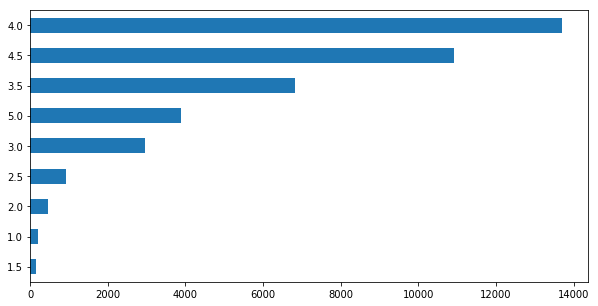

In [195]:
plt.figure(figsize=(10, 5))
df_train['Rating'].value_counts(ascending=True).plot(kind='barh');

### Посмотрим распределение целевой переменной относительно признака ranking_norm

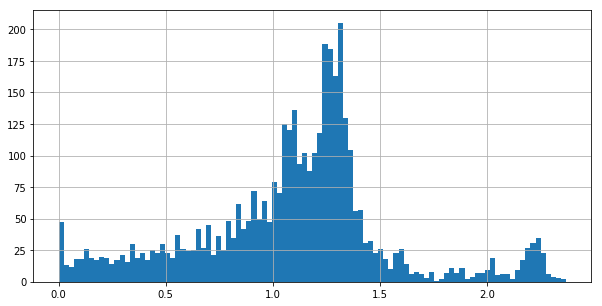

In [196]:
plt.figure(figsize=(10, 5))
data['ranking_norm'][data['Rating'] == 5].hist(bins=100);

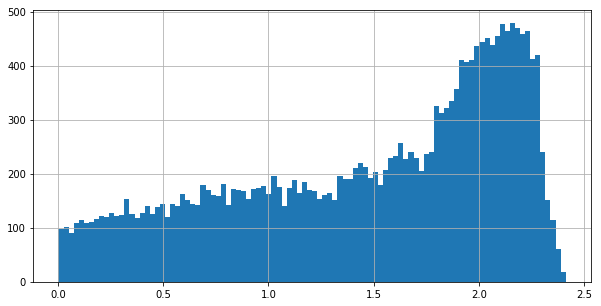

In [197]:
plt.figure(figsize=(10, 5))
data['ranking_norm'][data['Rating'] < 4].hist(bins=100);

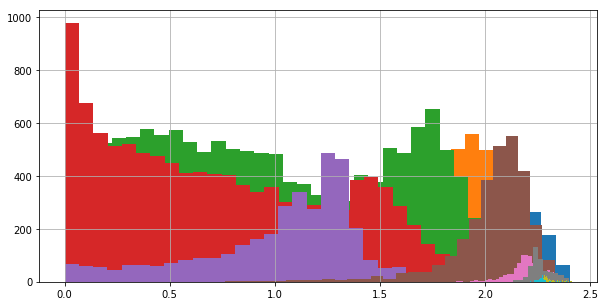

In [198]:
for x in data.Rating.unique():
    data['ranking_norm'][data['Rating'] == x].hist(bins=35)

### Корреляция признаков

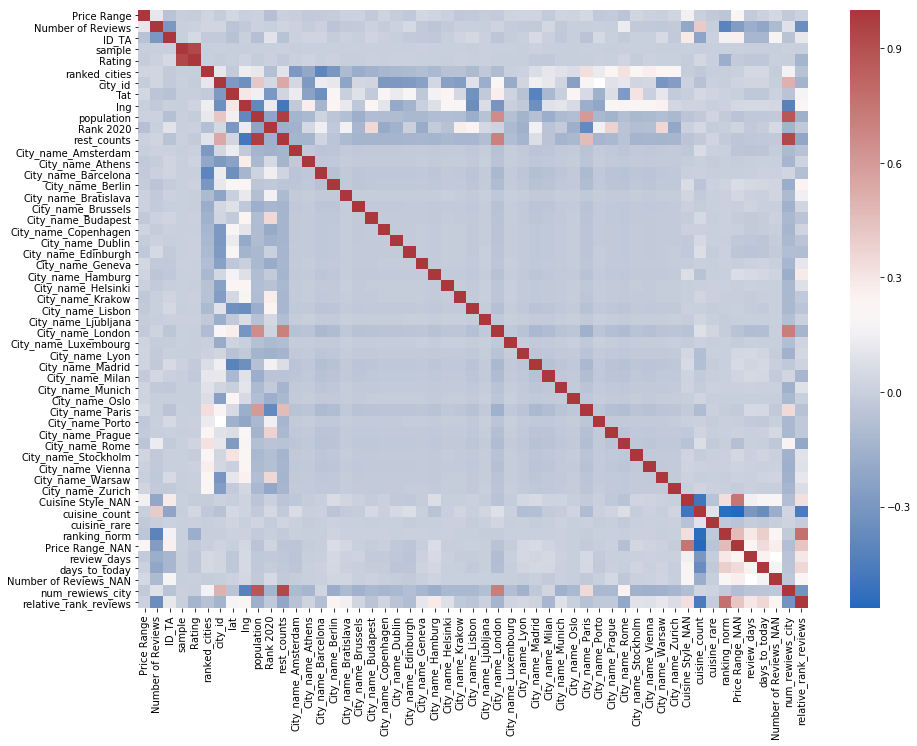

In [199]:
plt.rcParams['figure.figsize'] = (15,11)
sns.heatmap(data.drop(cuisine_lst, axis=1).corr(), cmap='vlag');

In [200]:
data.drop(cuisine_lst, axis=1).corr().Rating.sort_values(ascending=False).to_frame()# dummy кухонь не включал

,Rating
Rating,1.000000
sample,0.936543
ID_TA,0.049589
cuisine_count,0.034506
City_name_Rome,0.027527
City_name_Athens,0.016852
lng,0.016663
City_name_Berlin,0.012834
Number of Reviews,0.011011
City_name_Vienna,0.010188


# Data Preprocessing

In [201]:
# Теперь выделим тестовую часть
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [202]:
# Воспользуемся специальной функцией train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [203]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 178), (40000, 178), (40000, 177), (32000, 177), (8000, 177))

# Model 
Сам ML

In [210]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [211]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [213]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)
# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [103]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [208]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

NameError: name 'y_pred' is not defined

In [ ]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [ ]:
test_data.sample(10)

In [ ]:
test_data = test_data.drop(['Rating'], axis=1)

In [ ]:
sample_submission

In [ ]:
predict_submission = model.predict(test_data)

In [ ]:
predict_submission

In [ ]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
